<a href="https://colab.research.google.com/github/STRMNGnwo/A-Star-Implementation/blob/master/DeepLearningAssignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CT5133 - Assignment 1

  -Submitted by Srinivas Ilancheran (19280039) and Lukasz Szemet (19502109) of the MSc Artificial Intelligence programme



# Assignment Sections:

### Section 1

**Instructions:**

Implement Logistic Regression (Topic 2):
  1. Use Jupyter Notebook (Python or R) to implement a neural network approach to logistic regression (no hidden layers, one output node)
  2. Your code should follow my notes to implement the algorithm from scratch.
  3. Your notebook should include a brief description of the algorithm, with all references.
  4. Your code must handle different numbers of inputs and different numbers of training cases, but you don't have to support more than one binary output node

Part 1 notes

Class node
4 functions
contructor(input then init weights), activation(sigmoid function), weighted sum(w .  x + b), forward


In [ ]:
import numpy as np
import sys
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
np.random.seed = 69

In [ ]:
class LogisticRegressionNeuron:

  def __init__(self,data_shape):


    self.weights=np.random.rand(*data_shape)

    #self.weights=np.squeeze(self.weights)
    '''the squeeze is done to change the shape from 1,3 to just 3, (Which is the shape of the input)
    this is necessary as in the dot product function, we're doing input * weight (input is of shape 3,0 which would make dot product with 1,3 shape impossible)

    An easier fix would simply be changing the order of dot product to be weight* input (1,3 can be multiplied with shape 3,0)

    '''
    print("Initial weights matrix:", self.weights)
    print("Shape of Initial weights matrix:", self.weights.shape)
    # initialising a bias value
    self.bias=np.random.rand(1,1)


  def weighted_sum_func(self,input):

    return np.dot(self.weights,input) + self.bias


  def activation_func(self,input):

      return 1/(1+np.exp(-input))


  def forward(self,input):

    #defining a single pass

    #send the input into the weighted sum function, to get W . input

    weighted_sum=self.weighted_sum_func(input)

    #send the weighted_sum into the activation function (sigmoid) to get either a 0, or a 1 (based on threshold value)
    activation_output=self.activation_func(weighted_sum)

    return activation_output



In [ ]:
def train_model(model,training_data_X,training_data_Y, training_params):

  # SGD parameters
  epochs=training_params["epochs"]
  max_iterations= len(training_data_X)*epochs

  print("Max iterations: ",max_iterations)
  learning_rate=training_params["lr"]

  #probability threshold:
  threshold=0.5

  samples=training_data_X.to_numpy()
  labels=training_data_Y.to_numpy()

  i=0
  prev_loss=0
  running_loss=0

  loss_per_epoch=[]
  #Training loop to perform SGD:
  while i<max_iterations:
    #randomly choose a training sample from samples
    rand_sample_index=np.random.randint(len(samples))

    input_sample=np.array(samples[rand_sample_index])

    #print("Shape of input sample:",input_sample.shape)

    #input_sample -> for the should be of shape (1,num.attributes) as its a single row containing num.attributes columns

    #model output -> probability
    probability=model.forward(input_sample)

    #convert probability into label
    predicted_label=1 if probability>0.5 else 0

    #calculate loss using Stochastic Gradient Descent
    # input_sample[1] is true class value (Actually, a sample's attributes-> samples[rand_sample], true class value-> labels[rand_sample])
    curr_loss = -((labels[rand_sample_index]*np.log(probability)) + (1-labels[rand_sample_index]) * np.log(1-probability))

    #print("Curr loss: ", curr_loss)

    delta_w = np.zeros(model.weights.shape)

    for idx, weight in enumerate(model.weights):
      delta_w[idx] = (probability - labels[rand_sample_index])*input_sample[idx]

    delta_b = (probability - labels[rand_sample_index])

    for idx, weight in enumerate(model.weights):
      model.weights[idx] -= learning_rate * delta_w[idx]

    model.bias -= learning_rate * delta_b

    i += 1
    running_loss += curr_loss

    #running_loss is loss per epoch
    if i%len(samples)==0:
      #print(f"{i/len(samples)} Epochs finished")
      loss_per_epoch.append(running_loss)
      #print(f"running_loss: {running_loss}, prev_loss: {prev_loss}, running-prev: {running_loss-prev_loss}")
      if (abs(running_loss-prev_loss)) < 10**-2: #latter condition is to check for convergence (change in weights is minimal)
        print(f"Converged! after {i} iterations ")
        i = max_iterations
      prev_loss = running_loss
      running_loss = 0

  #plotting training loss curve:

  print("Loss Per Epoch: ",loss_per_epoch)
  plt.plot([j for j in range(len(loss_per_epoch))], np.squeeze(loss_per_epoch))
  plt.show()



### Section 2

**Instructions:**

• I will supply two fairly small datasets:
  – One will be linearly separable (almost or fully), the other will not
  – I will provide sample Python code to load and plot the datasets; you are
allowed to use this code in your own assignment

• Divide each dataset randomly into:
  – Training set (70%):use for main training
  – Validation set (15%): use for tuning, e.g. selecting learning rates
  – Test set (15%): held out set for final performance evaluation

• Train a logistic regressor using your code from
Part 1, and see how it performs on both datasets

• In your notebook, summarise results and
provide observations and conclusions


In [ ]:
#Using pandas to read in the csv
blobs_dataset=pd.read_csv("/content/blobs400.csv")
circles_dataset=pd.read_csv("/content/circles500.csv")

print("Blobs dataset:")
print(blobs_dataset.head())
print("\n\nCircles dataset:")
print(circles_dataset.head())

Blobs dataset:
         X1        X2        X3  Class
0  1.418221  2.124375 -0.433905      1
1  1.590404  0.935434  1.510369      1
2  2.311458 -1.026668  1.031930      1
3  1.186782  0.591894  0.563649      1
4  1.661888  4.047231  0.987049      0


Circles dataset:
         X0        X1  Class
0  0.180647  0.552945      1
1 -0.188674  0.325629      1
2  0.413742  0.931251      0
3 -0.199223  0.902665      0
4  0.488279 -0.341202      1


In [ ]:
training_blobs = blobs_dataset.sample(frac=0.7, random_state=69)
training_circles = circles_dataset.sample(frac=0.7, random_state=69)

training_blobs = blobs_dataset.sample(frac=0.7, random_state=69)
training_circles = circles_dataset.sample(frac=0.7, random_state=69)

rest_blobs = blobs_dataset.drop(training_blobs.index)
rest_circles = circles_dataset.drop(training_circles.index)

val_blobs = rest_blobs.sample(frac=0.5, random_state=69)
val_circles = rest_circles.sample(frac=0.5, random_state=69)

test_blobs = rest_blobs.drop(val_blobs.index)
test_circles = rest_circles.drop(val_circles.index)

#dividing the attributes and the label in the training blobs training dataset
training_blobs_X=training_blobs.loc[:, ["X1","X2","X3"]]
training_blobs_Y= training_blobs.loc[:, ["Class"]]

val_blobs_X = val_blobs.loc[:, ["X1","X2","X3"]]
val_blobs_Y = val_blobs.loc[:, ["Class"]]

test_blobs_X = test_blobs.loc[:, ["X1","X2","X3"]]
test_blobs_Y = test_blobs.loc[:, ["Class"]]

training_circles_X= training_circles.loc[:, ["X0","X1"]]
training_circles_Y= training_circles.loc[:, ["Class"]]

val_circles_X = val_circles.loc[:, ["X0","X1"]]
val_circles_Y = val_circles.loc[:, ["Class"]]

test_circles_X = test_circles.loc[:, ["X0","X1"]]
test_circles_Y = test_circles.loc[:,["Class"]]

print(training_blobs.iloc[[0]].shape)

print(training_blobs_X.shape)

print(training_blobs_Y.shape)

print(test_blobs.shape)

(1, 4)
(280, 3)
(280, 1)
(60, 4)


Initial weights matrix: [[0.1921571  0.53366277]]
Shape of Initial weights matrix: (1, 2)
Max iterations:  350000
Converged! after 259350 iterations 
Loss Per Epoch:  [array([[262.96392637]]), array([[256.96133258]]), array([[251.74126294]]), array([[258.06161615]]), array([[256.1859396]]), array([[250.50555782]]), array([[254.9983227]]), array([[234.95153586]]), array([[244.06064369]]), array([[251.03994563]]), array([[253.7925245]]), array([[254.87581287]]), array([[253.71567952]]), array([[246.87516021]]), array([[249.24354151]]), array([[241.89800184]]), array([[248.07075607]]), array([[244.60896244]]), array([[243.79636298]]), array([[249.07830673]]), array([[245.71653645]]), array([[241.1089136]]), array([[250.07879951]]), array([[248.17333928]]), array([[246.72726805]]), array([[244.9309516]]), array([[252.49973039]]), array([[245.89614375]]), array([[242.42968366]]), array([[247.23784853]]), array([[243.02011265]]), array([[246.85654418]]), array([[245.44387157]]), array([[248.

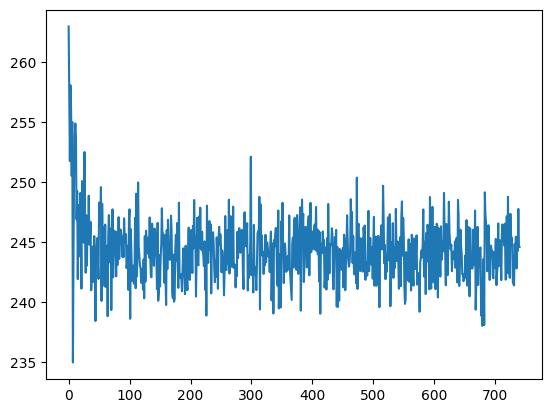

In [ ]:
#initialising the LogisiticRegression Neuron
LR_Model_circles=LogisticRegressionNeuron(np.array(training_circles_X.iloc[[0]]).shape)

#setting training params
train_params={ "epochs":1000,"lr":0.001}

#training the model on the blobs dataset's training partition
train_model(LR_Model_circles,training_circles_X,training_circles_Y, train_params)

Initial weights matrix: [[0.61541682 0.44459065 0.92148942]]
Shape of Initial weights matrix: (1, 3)
Max iterations:  2800000
Loss Per Epoch:  [array([[555.10787702]]), array([[382.77684804]]), array([[327.63285212]]), array([[259.9248785]]), array([[202.60069909]]), array([[171.9851108]]), array([[162.17079492]]), array([[150.93831859]]), array([[146.90478849]]), array([[135.23903603]]), array([[134.78298851]]), array([[135.8423208]]), array([[133.0361164]]), array([[137.8820608]]), array([[135.35379714]]), array([[130.51071368]]), array([[130.5605072]]), array([[131.61035536]]), array([[129.81836279]]), array([[124.3049203]]), array([[128.63264217]]), array([[126.89930291]]), array([[127.50621452]]), array([[126.66329609]]), array([[126.28034735]]), array([[129.98520573]]), array([[132.67523157]]), array([[131.99409441]]), array([[132.47689459]]), array([[133.69484711]]), array([[133.91863764]]), array([[128.74466753]]), array([[130.41287887]]), array([[128.46582091]]), array([[130.0

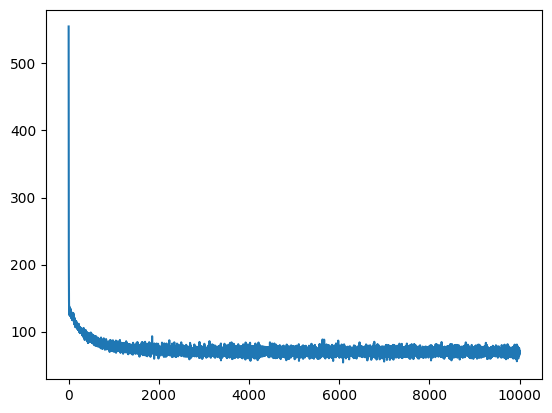

In [ ]:
#initialising the LogisiticRegression Neuron
LR_Model=LogisticRegressionNeuron(np.array(training_blobs_X.iloc[[0]]).shape)

#setting training params
train_params={ "epochs":10000,"lr":0.0005}

#training the model on the blobs dataset's training partition
train_model(LR_Model,training_blobs_X,training_blobs_Y, train_params)

In [ ]:
print("New weights matrix value:", LR_Model.weights)

New weights matrix value: [[-1.05679313 -1.04821401 -1.37796718]]


### Evaluating the model's accuracy on the datasets

In [ ]:
def evaluate_model(model, data,labels):
  predictions = []
  threshold = 0.5
  for i in range(data.shape[0]):
    predictions.append((model.forward(np.squeeze(np.array(data.iloc[[i]])))).item())

  predicted_classes = [1 if probability >= threshold else 0 for probability in predictions]

  actual_classes = list(labels.values.ravel())
  print(predicted_classes)

  matching_elements = sum(actual == pred for actual, pred in zip(actual_classes, predicted_classes))

  accuracy = matching_elements / len(predicted_classes) * 100

  print(f"Accuracy: {accuracy}")

In [ ]:
# Evaluating blobs model
evaluate_model(LR_Model,val_blobs_X,val_blobs_Y)

[0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1]
Accuracy: 96.66666666666667


In [ ]:
# Evaluating circles model
evaluate_model(LR_Model_circles, val_circles_X, val_circles_Y)

[1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1]
Accuracy: 56.00000000000001


### Section 3

In [ ]:
#input -> insert(couple nodes in the hidden layer) -> output :)
class NeuralNet:
  def __init__(self, nodes):
    self.nodes = nodes

  def forward(self):
    for node in self.nodes:
      node.forward()


### Section 4

### Section 5